In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [9]:
def loadRawData(filename, nrows):
    return pd.read_parquet(filename)[:nrows]


def selectColumns(dataframe, columns):
    newDataframe = dataframe.copy()
    return newDataframe[columns]

def convertTimes(dataframe, columns):
    #return dataframe[columns].apply(convertTimesHelper)
    for column in columns:
        dataframe[column] = pd.to_timedelta(dataframe[column], errors='coerce') / np.timedelta64(1, 'm')

def convertTimesHelper(dataframe):
    return pd.to_timedelta(dataframe, errors='coerce') / np.timedelta64(1, 'm')

def removeNullValues(dataframe):
    dataframe.dropna(axis=0, inplace=True)


data = loadRawData('recipes.parquet', 100)

keepColumns = ['Name',
               'CookTime', 'PrepTime', 'TotalTime', 
               'RecipeCategory', 
               #'RecipeIngredientQuantities', 
               'RecipeIngredientParts',
               'RecipeInstructions']
reducedData = selectColumns(data, keepColumns)

convertTimes(reducedData, columns=['CookTime', 'PrepTime', 'TotalTime'])

removeNullValues(reducedData)

In [10]:
reducedData.head()

,Name,CookTime,PrepTime,TotalTime,RecipeCategory,RecipeIngredientParts,RecipeInstructions
0,Low-Fat Berry Blue Frozen Dessert,1440.0,45.0,1485.0,Frozen Desserts,"[blueberries, granulated sugar, vanilla yogurt...","[Toss 2 cups berries with sugar., Let stand fo..."
1,Biryani,25.0,240.0,265.0,Chicken Breast,"[saffron, milk, hot green chili peppers, onion...",[Soak saffron in warm milk for 5 minutes and p...
2,Best Lemonade,5.0,30.0,35.0,Beverages,"[sugar, lemons, rind of, lemon, zest of, fresh...","[Into a 1 quart Jar with tight fitting lid, pu..."
3,Carina's Tofu-Vegetable Kebabs,20.0,1440.0,1460.0,Soy/Tofu,"[extra firm tofu, eggplant, zucchini, mushroom...","[Drain the tofu, carefully squeezing out exces..."
4,Cabbage Soup,30.0,20.0,50.0,Vegetable,"[plain tomato juice, cabbage, onion, carrots, ...","[Mix everything together and bring to a boil.,..."


In [14]:
reducedData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CookTime,79.0,85.379747,167.622080,3.0,25.0,50.0,97.5,1440.0
PrepTime,79.0,60.316456,162.538638,5.0,20.0,35.0,50.0,1440.0
TotalTime,79.0,145.696203,228.951532,15.0,50.0,85.0,156.0,1485.0


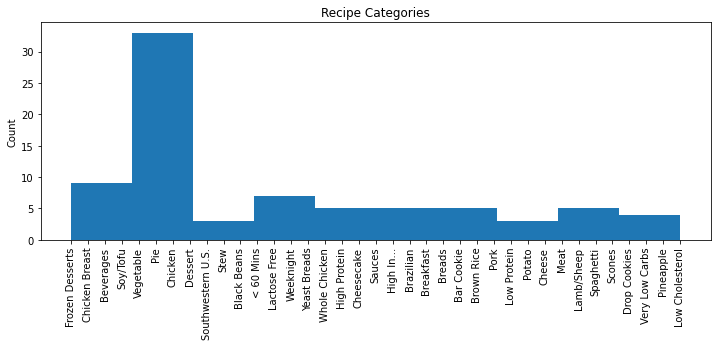

In [11]:
figCategories = plt.figure(figsize=(12, 4))
plt.hist(reducedData['RecipeCategory'])
plt.title('Recipe Categories')
plt.ylabel('Count')
plt.xticks(rotation=90);

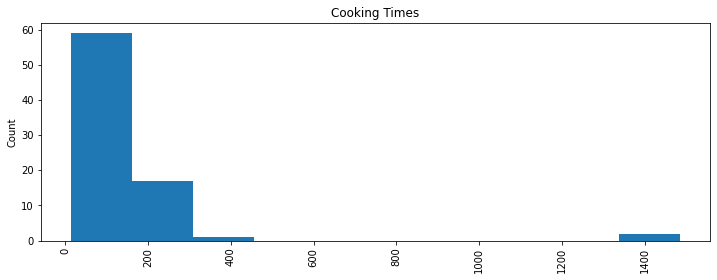

In [12]:
figTotalTime = plt.figure(figsize=(12, 4))
plt.hist(reducedData['TotalTime'])
plt.title('Cooking Times')
plt.ylabel('Count')
plt.xticks(rotation=90);